In [1]:
import requests
from bs4 import BeautifulSoup 
import string
import sys
sys.setrecursionlimit(1500) # Increase recursion limit
from collections import Counter
from nltk.corpus import stopwords
import nltk 
import re
nltk.download('stopwords')
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /home/docode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Getting the Data

**get_content(string)** function below retrieves the content from the selected Wikipedia Article. If you want to change the article, please note that the first word should be capitalized and words should be separated by an underscore


In [2]:
# Retrieves information about the article
def get_content(string):
    
    source = requests.get(f"https://en.wikipedia.org/wiki/" + string) # Get access to the article
    soup = BeautifulSoup(source.text, 'lxml')
    wiki_heading = soup.find('h1').text
    wiki_text = ""
    
    # Get the content from the paragraphs using the for loop
    for paragraphs in soup.find('div','mw-parser-output').text :
        wiki_text += paragraphs
    
    # Adding article heading to the paraprahs text
    final_dictionary = wiki_heading + wiki_text  
    return final_dictionary 

string = 'Climate_change' # You can access another wikipedia article by changing the string. Please note that first word should be capitalized and words should be separated by underscore

print(get_content(string)) # Prints the content


Climate changeFor a discussion of climate trends throughout Earth's history, see Climate variability and change. For other uses, see Climate change (disambiguation).
"Global warming" redirects here. For other uses, see Global warming (disambiguation).


Current rise in Earth's average temperature and its effects


 Average surface air temperatures from 2011 to 2020 compared to a baseline average from 1951 to 1980 (Source: NASA)
 Observed temperature from NASA versus the 1850–1900 average as a pre-industrial baseline. The main driver for increased global temperatures in the industrial era is human activity, with natural forces adding variability.[1]
Climate change includes both global warming driven by human emissions of greenhouse gases and the resulting large-scale shifts in weather patterns. Though there have been previous periods of climatic change, since the mid-20th century humans have had an unprecedented impact on Earth's climate system and caused change on a global scale.[2]
Th

## Data Cleaning

**merge_contents (data)** function removes all the flourish like markups, the urls and any useless words or characters

In [3]:
# Merges and stores the content in a list

def merge_contents(data):
    list_type = get_content(data)

    # Removing unnecessary characters from a content 
    list_type = re.sub(r"^$.\n" ,"\n",list_type)
    list_type = list_type.replace("\'s","'s")
    list_type = list_type.replace('\xa0','')
    list_type = list_type.split('\n') # Splitting string by sentence
    list_type = list(filter(None, list_type))
    list_type.pop()
    return list_type[5:] # Ignores initial useless lines at the Wikipedia Article

In [12]:
# Calling the obtained list without urls and other useless characters
def main():
    string = 'Climate_change'
    print(merge_contents(string))

if __name__=="__main__": 
    main()

["Climate change includes both global warming driven by human emissions of greenhouse gases and the resulting large-scale shifts in weather patterns. Though there have been previous periods of climatic change, since the mid-20th century humans have had an unprecedented impact on Earth's climate system and caused change on a global scale.[2]", 'The largest driver of warming is the emission of greenhouse gases, of which more than 90% are carbon dioxide (CO2) and methane.[3] Fossil fuel burning (coal, oil, and natural gas) for energy consumption is the main source of these emissions, with additional contributions from agriculture, deforestation, and manufacturing.[4]  The human cause of climate change is not disputed by any scientific body of national or international standing.[5] Temperature rise is accelerated or tempered by climate feedbacks, such as loss of sunlight-reflecting snow and ice cover, increased water vapour (a greenhouse gas itself), and changes to land and ocean carbon si

##  Tokenizing and lowering the list

As we have data in one place, **custome_split(sepr_list, str_to_split)** dissects our data and build a list of all the words.

In [5]:
# Writing a function that splits list based on the separators

def custom_split(sepr_list, str_to_split):
    new_list = []
    # create regular expression dynamically
    for word in str_to_split:
        regular_exp = '|'.join(map(re.escape, sepr_list))
        new_list += re.split(regular_exp, word)
    return new_list

# Tokenize list based on splitting characters

def tokenize(content):
    list_type = merge_contents(content)
    separators =  [" ", "\n",".", "(", ")"]
    return custom_split(separators, list_type)

# Updating collection of words to be lower case 
def lower_collection(collection):
    my_list = tokenize(collection)
#     my_list = list(filter(None, my_list))
    for i in range (len(my_list)):
        my_list[i] = my_list[i].lower() 
    return my_list

In [6]:
# Returns tokenizer list of words in lower case  
def main():
    string = 'Climate_change'
    print(lower_collection(string))

if __name__=="__main__": 
    main()

['climate', 'change', 'includes', 'both', 'global', 'warming', 'driven', 'by', 'human', 'emissions', 'of', 'greenhouse', 'gases', 'and', 'the', 'resulting', 'large-scale', 'shifts', 'in', 'weather', 'patterns', '', 'though', 'there', 'have', 'been', 'previous', 'periods', 'of', 'climatic', 'change,', 'since', 'the', 'mid-20th', 'century', 'humans', 'have', 'had', 'an', 'unprecedented', 'impact', 'on', "earth's", 'climate', 'system', 'and', 'caused', 'change', 'on', 'a', 'global', 'scale', '[2]', 'the', 'largest', 'driver', 'of', 'warming', 'is', 'the', 'emission', 'of', 'greenhouse', 'gases,', 'of', 'which', 'more', 'than', '90%', 'are', 'carbon', 'dioxide', '', 'co2', '', 'and', 'methane', '[3]', 'fossil', 'fuel', 'burning', '', 'coal,', 'oil,', 'and', 'natural', 'gas', '', 'for', 'energy', 'consumption', 'is', 'the', 'main', 'source', 'of', 'these', 'emissions,', 'with', 'additional', 'contributions', 'from', 'agriculture,', 'deforestation,', 'and', 'manufacturing', '[4]', '', 'the',

## Term Frequency

Now we will build a simple frequency model. In other words, given a word, we need to find the articles in which this word is the most frequent:

In [7]:
# Counts the number of occurrences of each word in the list.
def count_frequency(collection):
    my_list = lower_collection(collection)
    string = []
    new_list = ""
    # Get Unique characters
    for token in my_list:
        if token not in string:
            string.append(token)
    # Prints every frequency of every single character
    for word in range(len(string)):
        new_list += 'Frequency of ' + string[word] + ' is: ' + str(my_list.count(string[word])) + '\n'
    return new_list

# Prints the n (number) most frequent words along with their frenquency.
def print_most_frequent(frequencies, number):
    data = lower_collection(frequencies)
    characters_to_delete = ['.',',','(','"',':','^','p', '-', ']','/','[',';','–',')','', 'doi:10', 'pdf', '(pdf)', '2019', '2020','etal', 'et', 'al', 'pp']
    new_list = []
    for tokens in data:
        if tokens not in characters_to_delete:
            new_list.append(tokens)
    count = Counter(new_list)
    most_common = count.most_common(number)
    return (most_common) 

In [8]:
# Printing Most Frequent Characters
def main():
    string = 'Climate_change'
    number = 25 # Printing most frequent 25 characters
    print(print_most_frequent(string,number))

if __name__=="__main__": 
    main()

[('the', 937), ('of', 663), ('and', 632), ('climate', 450), ('to', 348), ('in', 338), ('a', 249), ('change', 231), ('on', 229), ('ipcc', 179), ('global', 174), ('from', 169), ('for', 147), ('is', 138), ('warming', 130), ('by', 126), ('as', 126), ('carbon', 113), ('retrieved', 103), ('are', 97), ('greenhouse', 89), ('emissions', 87), ('that', 84), ('have', 83), ('1', 79)]


## Visualizing 25 most frequent characters

Printing the most frequent words is a good way to get a feel of the words distribution, but is not very telling.

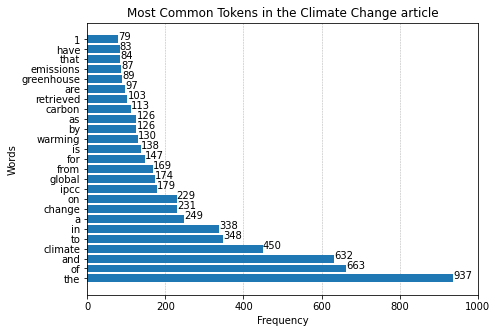

In [9]:
# Visualizes 25 most frequent words plotting in horizontal barchart. The title of the plot and axises are named

def visualizer (words, numbers):
    
    data = print_most_frequent(words, numbers)
    x = []
    y = []
    for i in range (len(data)):
        x.append(data[i][1])
        y.append(data[i][0])
    fig = plt.figure(figsize = (7,5))
    ax1 = plt.subplot (1,1,1)
    ax1.barh(y, x)
    plt.xlabel('Frequency')
    plt.ylabel('Words')

    for Y, X in enumerate (x):
        ax1.annotate("{:,}".format(X), xy = (X,Y))
        ax1.set_xlim(0,1000)
        ax1.xaxis.grid(linestyle ='--',linewidth = 0.5)
        ax1.set_axisbelow(True)
        ax1.set_title('Most Common Tokens in the Climate Change article')

def main():
    string = 'Climate_change'
    numbers = 25
    visualizer(string, numbers)

if __name__=="__main__": 
    main()

# Filtering Stop Words and Visualizing 25 Most Frequent Characters

As we can see from the graph above, determiners and articles do not help to understand the topic of an article or a corpus. Out of the 25 most frequent words from the whole article, only 7 of them are useful to classify that article is about climate change. The unsignificant words are called **stop words**

Function **remove_stop_words(words, stop_words, number)** filters the stop words and leaves only meaningful words

In [10]:
# Function removes stop_words from the list, i.e. filters the list

def remove_stop_words(words, stop_words, number):
    
    words = lower_collection(words)
    characters_to_delete = ['.',',','(','"',':','^','p', '-', ']','/','[',';','–',')','', 'doi:10', 'pdf', '(pdf)', '2019', '2020','etal', 'et', 'al', 'pp'] # Lists unnecessary characters 
    new_list = []
    
    # For Loop used to deletes unnecessary characters
    for tokens in words:
        if tokens not in characters_to_delete:
            new_list.append(tokens)
    stop_words = set(stopwords.words("english")) # Using the NLTK library to obtain list of stop words 
    filtered_sentence = [] 
    
    # For Loop used to delete the stop words 
    for word in new_list:
        if word not in stop_words:
            filtered_sentence.append(word)
    further_words_to_filter = ['2018','j','k','also', '&', '1','2','3','9','):', '2018,','2019,', 'ar5' ] # Further unnecessary characters
    final_filtered_list = []
    
    # For Loop used to delete further unnecessary characters to obtain a final filtered_sentence
    for w in filtered_sentence:
        if w not in further_words_to_filter:
            final_filtered_list.append(w)
    count = Counter(final_filtered_list)
    most_common = count.most_common(number)
    return (most_common) 

# Visualizes 25 most frequent characters in the article without the stop words.
def filtered_visualizer(words, stop_words,number):
    
    most_common = remove_stop_words(words, stop_words, number)
    x = []
    y = []
    for i in range (len(most_common)):
        x.append(most_common[i][1])
        y.append(most_common[i][0])
    fig = plt.figure(figsize = (7,5))
    ax1 = plt.subplot (1,1,1)
    ax1.barh(y, x)
    plt.xlabel('Frequency')
    plt.ylabel('Words')

    for Y, X in enumerate (x):
        ax1.annotate("{:,}".format(X), xy = (X,Y))
        ax1.set_xlim(0,500)
        ax1.xaxis.grid(linestyle ='--',linewidth = 0.5)
        ax1.set_axisbelow(True)
        ax1.set_title('Most Common Tokens in the Climate change article')

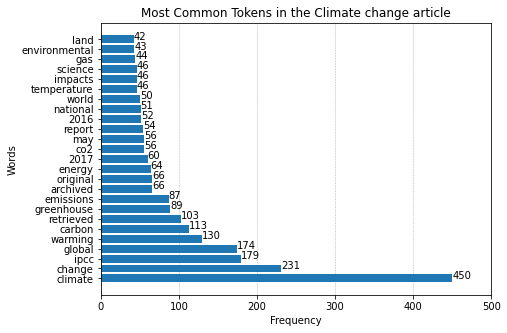

In [11]:
def main():
    string = 'Climate_change'
    stop_words = set(stopwords.words('english'))
    numbers = 25
    filtered_visualizer(string, stop_words, numbers)

if __name__=="__main__": 
    main()

## Conclusion

The most frequent words now more relevant to match the Climate Change article content. If the user's search is made of the words "climate" and "carbon", we can vectorize articles and represent them with a vector of size 2. The coefficient of the vectorized article would be the frequencies of the words from the search. By vectorizing all articles this way, we can build a cosine distance to measure the similarity between the content of the articles.